In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load CSV

- Load the CSV file containing the scores data
- Filter the data to include only the "Foundations of ML" course

In [3]:
df = pd.read_csv('data/raw/scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


### Data Exploration

- Load X as 'Attendance' and Y as 'CapstoneScore'
- Plot X vs Y

In [5]:
X = df['Attendance'].values
Y = df['CapstoneScore'].values

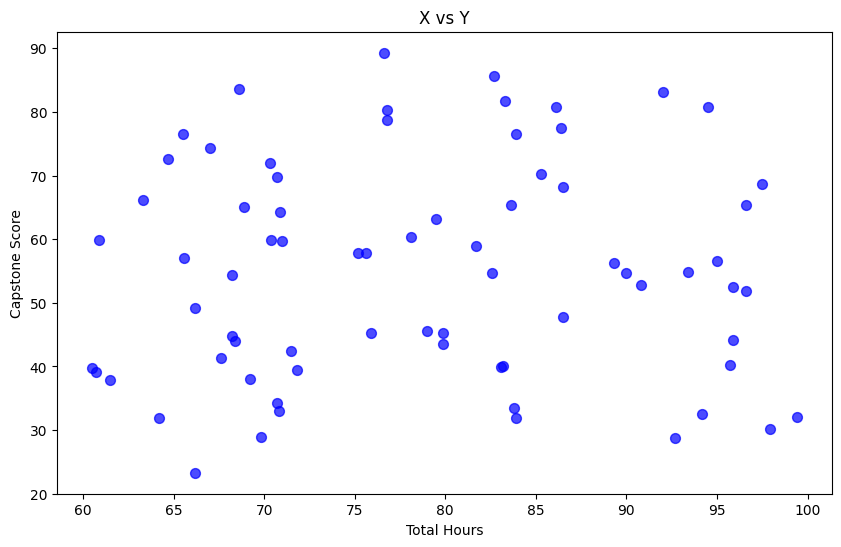

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.7, color='blue', s=50)
plt.xlabel('Total Hours')
plt.ylabel('Capstone Score')
plt.title('X vs Y')
plt.show()

### Data Preparation

- Check for missing values

In [7]:
missing_values_attendance = df['Attendance'].isnull().sum()
missing_values_capstone_score = df['CapstoneScore'].isnull().sum()

print(f'Missing values in Attendance: {missing_values_attendance}')
print(f'Missing values in CapstoneScore: {missing_values_capstone_score}')

Missing values in Attendance: 0
Missing values in CapstoneScore: 0


Since there are no missing values, we can proceed with the analysis.

### Util functions

- format_value_for_printing: Format values for better readability

In [8]:
def format_value_for_printing(value):
    if np.isinf(value):
        return "∞"
    elif np.isnan(value):
        return "NaN"
    elif value > 1e6:
        return f"{value:.2e}"
    elif value < 1e6:
        return f"{value:.2e}"
    elif value > 1000:
        return f"{value:.1f}"
    else:
        return f"{value:.4f}"

### Analyzing Functions

- create_polynomial_features: Create polynomial features to specified degree
- fit_polynomial: Fit a polynomial regression model

In [12]:
# Constants
CONVERGENCE_THRESHOLD = 0.00001

In [26]:
def create_polynomial_features(X, degree):
    return np.array([X**i for i in range(degree + 1)]).T

def fit_polynomial(X, Y, degree, learning_rate):
    num_iterations = 1000
    cost_history = []
    converged = False

    X_poly = create_polynomial_features(X, degree)
    beta = np.zeros(degree + 1)
    m = len(Y)

    for i in range(num_iterations):
        predictions = X_poly.dot(beta)
        cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
        cost_history.append(cost)

        gradients = (1 / m) * X_poly.T.dot(predictions - Y)
        beta = beta - learning_rate * gradients

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {format_value_for_printing(cost)}")

        # Check for convergence
        if i > 10:
            change = abs(cost_history[-1] - cost_history[-10])
            if change < CONVERGENCE_THRESHOLD:
                print(f"Converged at {i}")
                converged = True
                break

        # Check for non convergence
        if np.isinf(cost):
            print("Cost diverged. Exiting...")
            break

    return beta, cost_history, converged

def predict_polynomial(X, beta, degree):
    X_poly = create_polynomial_features(X, degree)
    predictions = X_poly.dot(beta)
    return predictions

### Check different degrees

In [13]:
model_1 = fit_polynomial(X, Y, degree=1, learning_rate=0.001)
model_2 = fit_polynomial(X, Y, degree=2, learning_rate=0.001)
model_3 = fit_polynomial(X, Y, degree=3, learning_rate=0.001)

Iteration 0: Cost = 1.66e+03
Iteration 100: Cost = 5.20e+148
Iteration 200: Cost = 1.81e+294
Cost diverged. Exiting...
Iteration 0: Cost = 1.66e+03
Cost diverged. Exiting...
Iteration 0: Cost = 1.66e+03
Cost diverged. Exiting...


/Users/pasang/Desktop/FOML/FOML 1 - Code/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/2k/mzlqs6js09g3x_x6cqrsjhp40000gn/T/ipykernel_18479/298103361.py:15: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)


### Visualize results

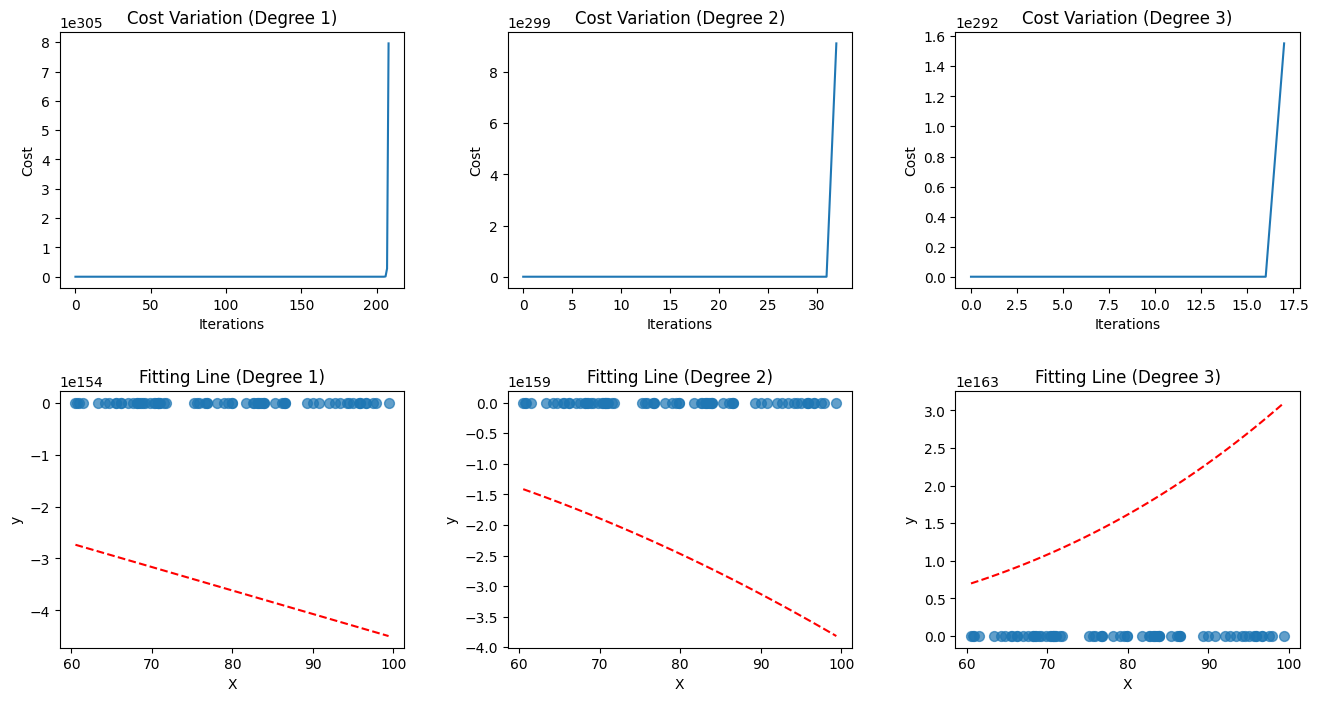

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

x_min, x_max = float(np.min(X)), float(np.max(X))
x_interval = np.linspace(x_min, x_max, 100)

ax = axes[0, 0]
ax.plot(model_1[1], label='Degree 1')
ax.set_title('Cost Variation (Degree 1)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

ax = axes[0, 1]
ax.plot(model_2[1], label='Degree 2')
ax.set_title('Cost Variation (Degree 2)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

ax = axes[0, 2]
ax.plot(model_3[1], label='Degree 3')
ax.set_title('Cost Variation (Degree 3)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

ax = axes[1, 0]
ax.scatter(X, Y, s=50, alpha=0.7, label="Actual data")
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = predict_polynomial(X_plot, model_1[0], 1).flatten()
ax.plot(X_plot, y_plot, 'r--', label='fitted line')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Fitting Line (Degree 1)')

ax = axes[1, 1]
ax.scatter(X, Y, s=50, alpha=0.7, label="Actual data")
y_plot = predict_polynomial(X_plot, model_2[0], 2).flatten()
ax.plot(X_plot, y_plot, 'r--', label='fitted line')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Fitting Line (Degree 2)')

ax = axes[1, 2]
ax.scatter(X, Y, s=50, alpha=0.7, label="Actual data")
y_plot = predict_polynomial(X_plot, model_3[0], 3).flatten()
ax.plot(X_plot, y_plot, 'r--', label='fitted line')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Fitting Line (Degree 3)')

plt.subplots_adjust(
    hspace=0.4,
    wspace=0.3
)
plt.show()